In [ ]:
import pandas as pd
from pandas_datareader.data import DataReader
from datetime import date

In [11]:
start = date(2016, 1, 1)
end = date(2017, 12, 31)
ticker = 'GOOG'
data_source = 'google'
stock_data = DataReader(ticker, data_source, start, end)
print(stock_data.head(), '\n')
print(stock_data.info())

              Open    High     Low   Close   Volume
Date                                               
2016-01-04  743.00  744.06  731.26  741.84  3258199
2016-01-05  746.45  752.00  738.64  742.58  1950691
2016-01-06  730.00  747.18  728.92  743.62  1947034
2016-01-07  730.31  738.50  719.06  726.39  2963741
2016-01-08  731.45  733.23  713.00  714.47  2450857 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2016-01-04 to 2017-12-29
Data columns (total 5 columns):
Open      503 non-null float64
High      503 non-null float64
Low       503 non-null float64
Close     503 non-null float64
Volume    503 non-null int64
dtypes: float64(4), int64(1)
memory usage: 23.6 KB
None


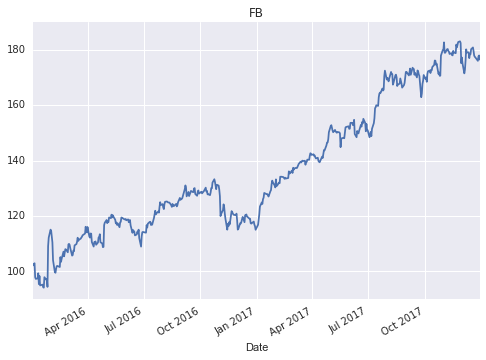

In [14]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Set start and end dates
start = date(2016, 1, 1)
end = date(2017, 12, 31)

# Set the ticker and data_source
ticker = 'FB'
data_source = 'google'

# Import the data using DataReader
stock_prices = DataReader(ticker, data_source, start, end)

# Plot Close
stock_prices['Close'].plot(title=ticker)

# Show the plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12995 entries, 1968-04-01 to 2018-01-19
Data columns (total 1 columns):
GOLDAMGBD228NLBM    12594 non-null float64
dtypes: float64(1)
memory usage: 203.0 KB


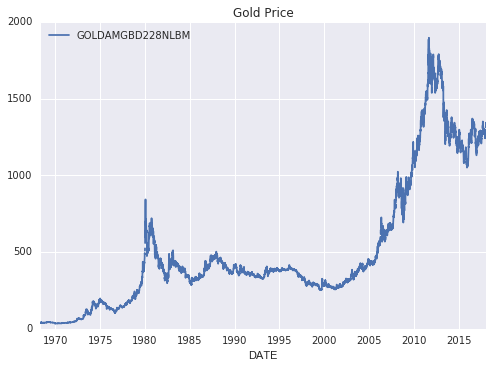

In [15]:
# Set start date
start = date(1968, 1, 1)

series = 'GOLDAMGBD228NLBM'

# Import the data
gold_price = DataReader(series, 'fred', start=start)

# Inspect the price of gold
gold_price.info()

# Plot the price of gold
gold_price.plot(title='Gold Price')

# Show the plot
plt.show()

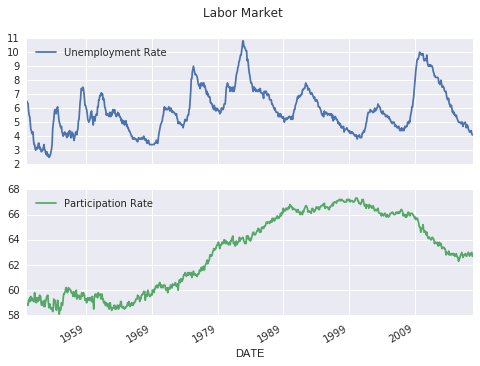

In [16]:
# Set the start date
start = date(1950, 1, 1)

# Define the series code
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred', start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market')

# Show the plot
plt.show()

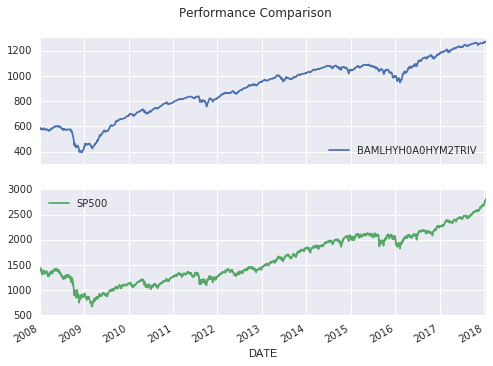

In [17]:
# Set the start date
start = date(2008, 1, 1)

# Set the series code
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series, 'fred', start)

# Plot the results
data.plot(subplots=True, title='Performance Comparison')

# Show the plot
plt.show()

In [20]:
######################################################################
# Example of auto concating for many sheets
# Create the pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')
# Extract the sheet names from xls
exchanges = xls.sheet_names
# Create an empty list: listings
listings = []
# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheetname=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)
# Concatenate the listings: listing_data
listing_data = pd.concat(listings)
######################################################################


# Select companies in Consumer Services
consumer_services = listing_data[listing_data.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values('Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
print(consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head())

                   Company Name Exchange  Market Capitalization
4              Amazon.com, Inc.   nasdaq           4.221385e+11
3013      Wal-Mart Stores, Inc.     nyse           2.218646e+11
3014  Walt Disney Company (The)     nyse           1.789973e+11
6           Comcast Corporation   nasdaq           1.764745e+11
1438     Home Depot, Inc. (The)     nyse           1.752626e+11


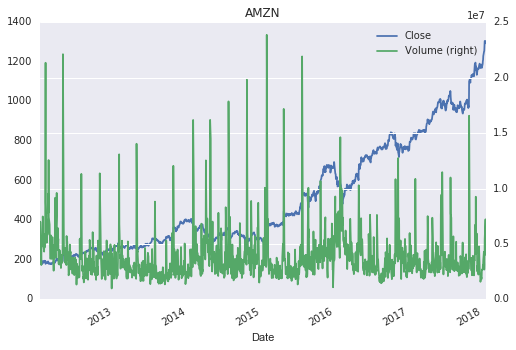

In [22]:
# Set the index of listings to Stock Symbol
listing_data = listing_data.set_index('Stock Symbol')

# Get ticker of the largest Consumer Services company
ticker = listing_data.loc[listing_data.Sector == 'Consumer Services', 'Market Capitalization'].idxmax()

# Set the start date
start = date(2012, 1, 1)

# Import the stock data
data = DataReader(ticker, 'google', start)

# Plot Close and Volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker)

# Show the plot
plt.show()

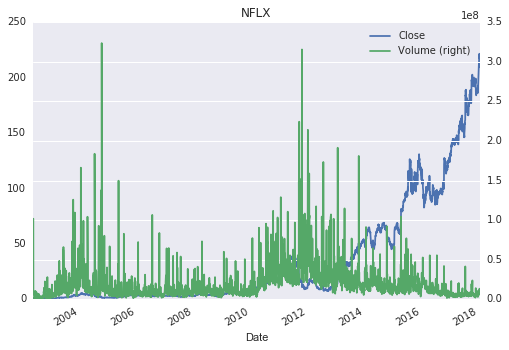

In [23]:
# Get ticker of the largest consumer services company listed after 1997
ticker = listing_data.loc[(listing_data.Sector == 'Consumer Services') & (listing_data['IPO Year'] > 1998), 'Market Capitalization'].idxmax()
# Set the start date
start = date(1998, 1, 1)
# Import the stock data
data = DataReader(ticker, 'google', start)
# Plot Close and Volume
data[['Close', 'Volume']].plot(secondary_y='Volume', title=ticker)
# Show the plot
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1521 entries, 2012-01-03 to 2018-01-19
Data columns (total 3 columns):
BAC    1521 non-null float64
JPM    1521 non-null float64
WFC    1521 non-null float64
dtypes: float64(3)
memory usage: 47.5 KB

                    Open   High    Low  Close       Volume
Date       minor                                         
2012-01-03 BAC     5.75   5.89   5.74   5.80  246293197.0
           JPM    34.06  35.19  34.01  34.98   44108273.0
           WFC    27.94  28.52  27.94  28.43   40072606.0
2012-01-04 BAC     5.71   5.88   5.59   5.81  243711165.0
           JPM    34.44  35.15  34.33  34.95   36576187.0 

minor        BAC    JPM    WFC
Date                          
2012-01-03  5.80  34.98  28.43
2012-01-04  5.81  34.95  28.56
2012-01-05  6.31  35.68  29.02
2012-01-06  6.18  35.36  28.94
2012-01-09  6.27  35.30  29.30 



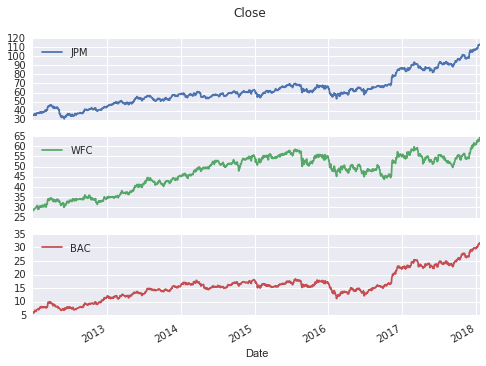

In [38]:
# Get ticker of 3 largest finance companies
top_3_companies = listing_data.loc[listing_data.Sector == 'Finance', 'Market Capitalization'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

# Set start date
start = date(2012,1,1)

# Import stock data
data = DataReader(top_3_tickers, 'google', start)
data2 = data.to_frame()

# Unstack and inspect result
data2['Close'].unstack().info()
print('\n', data2.head(), '\n')

data3 = data2['Close'].unstack()
print(data3.head(), '\n')

data3[top_3_tickers].plot(title='Close', subplots = True)
plt.show()